In [70]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
#przedział funkcji
a = -4 * math.pi
b = 3 * math.pi
#liczba punktów na wykresach i przy obliczaniu błędów
points = 1000

In [72]:
def func_plot(fn, a, b, n, label='', color='', figsize=(6, 4), subplot=None, title=''):
    if subplot is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        ax = subplot
    xs = np.linspace(a, b, num=n)
    ys = [fn(xi) for xi in xs]
    if color:
        ax.plot(xs, ys, label=label, color=color)
    else:
        ax.plot(xs, ys, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if label:
        ax.legend(loc="best")
    if title:
        ax.set_title(title)

In [73]:
def create_compare_errors_table(data):
    df = pd.DataFrame(data, index=["Błąd bezwzględny", "Błąd średniokwadratowy"])
    return df

In [74]:
def max_absolute_error(f, W, xs):
    return round(max([abs(f(x) - W(x)) for x in xs]),4)

In [75]:
def mse(f, W, xs):
    return round(sum([(f(x) - W(x)) ** 2 for x in xs]) / len(xs),4)

In [84]:
def calc_a_b(xs, ys, n, m):
    A = [0 for _ in range(m+1)]
    B = [0 for _ in range(m+1)]
    for i in range(m+1):
        A[i] = 2/n*sum(ys[j] * math.cos(i * xs[j]) for j in range(n))
        B[i] = 2/n*sum(ys[j] * math.sin(i * xs[j]) for j in range(n))
    return A, B

def transform_x(x, xs):
    a = xs[0]
    b = xs[-1]
    a_trans = -math.pi
    b_trans = math.pi
    return ((x - a) / (b - a)) * (b_trans - a_trans) + a_trans

def trigonometric_approximation(xs, ys, m):
    n = len(xs)
    transformed_xs = [transform_x(x, xs) for x in xs]
    A, B = calc_a_b(transformed_xs, ys,n, m)
    def func(x):
        x_transformed = transform_x(x, xs)
        return  1/2 * A[0] + sum(A[j] * math.cos(j * x_transformed) + B[j] * math.sin(j * x_transformed) for j in range(1, m))
    return func


In [77]:
def display_approximation(f,a,b,n,ms, approximation, labels, colors=[], title=''):
    xs = np.linspace(a,b, points)
    xs_approximation = np.linspace(a,b,n)
    ys_approximation = [f(x) for x in xs_approximation]
    fig, ax = plt.subplots(figsize=(6, 4))
    func_plot(f, a, b, 1000, label="F(x)", subplot=ax)
    ax.plot(xs_approximation, ys_approximation, 'o', c="r")
    approximation_errors = {}
    while len(colors) < len(ms):
        colors.append('')
    # if len(labels) == 0:
    #     for m in ms:
    #         print("m jest rowne: ", m, "\n")
    #         labels.append(f"m={m}")
    for i in range(len(ms)):
        labels.append(f"m={ms[i]}")
    print(labels)
    for i in range(len(ms)):
        approximation_func = approximation(xs_approximation, ys_approximation, ms[i])
        func_plot(approximation_func, a, b, 1000, label=labels[i], color=colors[i],title=title, subplot=ax)
        approximation_errors[labels[i]] = [max_absolute_error(f, approximation_func ,
                                                                                              xs), mse(f,
                                                                                                             approximation_func ,xs)]
    plt.show()

    display(create_compare_errors_table(approximation_errors))



In [78]:
def find_best_approximation(f,a,b,n,approximation,to, start=2,w=[]):
    xs = np.linspace(a,b, points)
    xs_approximation = np.linspace(a,b,n)
    ys_approximation = [f(x) for x in xs_approximation]

    results = []
    for i in range(start, to+1):
        approximation_func = approximation(xs_approximation, ys_approximation, i)
        error = mse(f,approximation_func ,xs)
        results.append((error, i))
        # if(error<min_error):
        #     min_error=error
        #     best_m=i
    return sorted(results)


In [79]:
f = lambda x, k=4, m=1: math.exp(-k * math.sin(m * x)) + k * math.sin(m * x) - 1

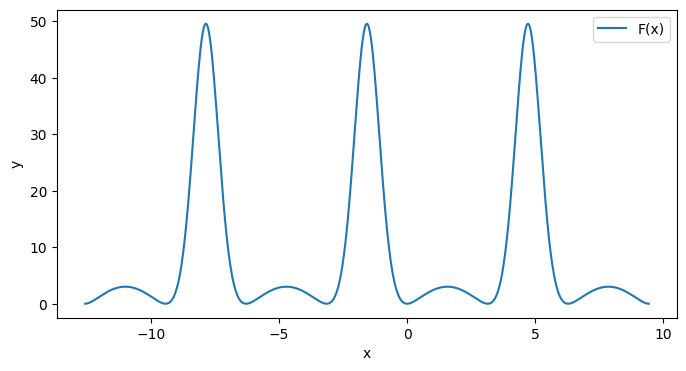

In [80]:
func_plot(f, a, b, 1000, label="F(x)", figsize=(8,4))

['m=9']


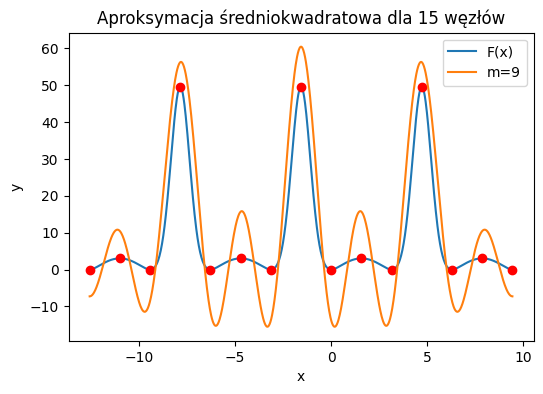

,m=9
Błąd bezwzględny,17.6181
Błąd średniokwadratowy,101.3762


In [86]:
n=15
m=[9]
display_approximation(f, a,b,n,m, trigonometric_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )